1 Feature Engineering and Modelling

In [1]:
##IMPORT PACKAGES 

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
# Shows plots in jupyter notebook
%matplotlib inline
# Set plot style
sns.set(color_codes=True)

In [2]:
df = pd.read_csv('D:\Loveforlearning_books\jobs_varsha\Practice_10jan\BCG\clean_data_after_eda.csv')
df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')

In [3]:
df.head(3)

Unnamed: 0                                id  channel_sales  cons_12m  \
0           0  24011ae4ebbe3035111d65fa7c15bc57              4         0   
1           1  d29c2c54acc38ff3c0614d0a653813dd              0      4660   
2           2  764c75f661154dac3a6c254cd082ea7d              4       544   

   cons_gas_12m  cons_last_month date_activ   date_end date_modif_prod  \
0         54946                0 2013-06-15 2016-06-15      2015-11-01   
1             0                0 2009-08-21 2016-08-30      2009-08-21   
2             0                0 2010-04-16 2016-04-16      2010-04-16   

  date_renewal  ...  mean_3m_price_p1_var  mean_3m_price_p2_var  \
0   2015-06-23  ...              0.131756              0.092638   
1   2015-08-31  ...              0.147600              0.000000   
2   2015-04-17  ...              0.167798              0.088409   

   mean_3m_price_p3_var  mean_3m_price_p1_fix  mean_3m_price_p2_fix  \
0              0.036909             42.497907             12.218665   
1              0.000000             44.444710              0.000000   
2              0.000000             44.444710              0.000000   

   mean_3m_price_p3_fix  mean_3m_price_p1 mean_3m_price_p2  mean_3m_price_p3  \
0              8.145777         42.629663        12.311304          8.182687   
1              0.000000         44.592310         0.000000          0.000000   
2              0.000000         44.612508         0.088409          0.000000   

   churn  
0      1  
1      0  
2      0  

[3 rows x 54 columns]

3. Feature engineering
1.3.1 Difference between off-peak prices in December and preceding January

In [4]:
##e code created by your colleague to calculate the feature described above. Use this code
##to re-create this feature and then think about ways to build on this feature to create features with
##a higher predictive power
price_df = pd.read_csv('D:\Loveforlearning_books\jobs_varsha\Practice_10jan\BCG\price_data.csv')
price_df["price_date"] = pd.to_datetime(price_df["price_date"],format='%Y-%m-%d')
price_df.head()

id price_date  price_off_peak_var  \
0  038af19179925da21a25619c5a24b745 2015-01-01            0.151367   
1  038af19179925da21a25619c5a24b745 2015-02-01            0.151367   
2  038af19179925da21a25619c5a24b745 2015-03-01            0.151367   
3  038af19179925da21a25619c5a24b745 2015-04-01            0.149626   
4  038af19179925da21a25619c5a24b745 2015-05-01            0.149626   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0             0.0                 0.0           44.266931             0.0   
1             0.0                 0.0           44.266931             0.0   
2             0.0                 0.0           44.266931             0.0   
3             0.0                 0.0           44.266931             0.0   
4             0.0                 0.0           44.266931             0.0   

   price_mid_peak_fix  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0

In [5]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()
# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()
# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1','price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'),
on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] -diff['price_off_peak_fix']
diff = diff[['id','offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

id  offpeak_diff_dec_january_energy  \
0  0002203ffbb812588b632b9e628cc38d                        -0.006192   
1  0004351ebdd665e6ee664792efc4fd13                        -0.004104   
2  0010bcc39e42b3c2131ed2ce55246e3c                         0.050443   
3  0010ee3855fdea87602a5b7aba8e42de                        -0.010018   
4  00114d74e963e47177db89bc70108537                        -0.003994   

   offpeak_diff_dec_january_power  
0                        0.162916  
1                        0.177779  
2                        1.500000  
3                        0.162916  
4                       -0.000001

In [6]:
df = pd.merge(df, diff, on='id')
df.head()

Unnamed: 0                                id  channel_sales  cons_12m  \
0           0  24011ae4ebbe3035111d65fa7c15bc57              4         0   
1           1  d29c2c54acc38ff3c0614d0a653813dd              0      4660   
2           2  764c75f661154dac3a6c254cd082ea7d              4       544   
3           3  bba03439a292a1e166f80264c16191cb              5      1584   
4           4  149d57cf92fc41cf94415803a877cb4b              0      4425   

   cons_gas_12m  cons_last_month date_activ   date_end date_modif_prod  \
0         54946                0 2013-06-15 2016-06-15      2015-11-01   
1             0                0 2009-08-21 2016-08-30      2009-08-21   
2             0                0 2010-04-16 2016-04-16      2010-04-16   
3             0                0 2010-03-30 2016-03-30      2010-03-30   
4             0              526 2010-01-13 2016-03-07      2010-01-13   

  date_renewal  ...  mean_3m_price_p3_var  mean_3m_price_p1_fix  \
0   2015-06-23  ...              0.036909             42.497907   
1   2015-08-31  ...              0.000000             44.444710   
2   2015-04-17  ...              0.000000             44.444710   
3   2015-03-31  ...              0.000000             44.444710   
4   2015-03-09  ...              0.073719             40.728885   

   mean_3m_price_p2_fix  mean_3m_price_p3_fix  mean_3m_price_p1  \
0             12.218665              8.145777         42.629663   
1              0.000000              0.000000         44.592310   
2              0.000000              0.000000         44.612508   
3              0.000000              0.000000         44.593296   
4             24.437330             16.291555         40.848791   

   mean_3m_price_p2  mean_3m_price_p3 churn  offpeak_diff_dec_january_energy  \
0         12.311304          8.182687     1                         0.020057   
1          0.000000          0.000000     0                        -0.003767   
2          0.088409          0.000000     0                        -0.004670   
3          0.000000          0.000000     0                        -0.004547   
4         24.539003         16.365274     0                        -0.006192   

   offpeak_diff_dec_january_power  
0                        3.700961  
1                        0.177779  
2                        0.177779  
3                        0.177779  
4                        0.162916  

[5 rows x 56 columns]

In [7]:
##Average price changes across periods
##We can now enhance the feature that our colleague made by calculating the average price changes
##across individual periods, instead of the entire year.
# Aggregate average prices per period by company
mean_prices = price_df.groupby(['id']).agg({
'price_off_peak_var': 'mean',
'price_peak_var': 'mean',
'price_mid_peak_var': 'mean',
'price_off_peak_fix': 'mean',
'price_peak_fix': 'mean',
'price_mid_peak_fix': 'mean'
}).reset_index()



In [8]:
# Calculate the mean difference between consecutive periods
mean_prices['off_peak_peak_var_mean_diff'] = mean_prices['price_off_peak_var']- mean_prices['price_peak_var']
mean_prices['peak_mid_peak_var_mean_diff'] = mean_prices['price_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_mid_peak_var_mean_diff'] =mean_prices['price_off_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix']- mean_prices['price_peak_fix']

mean_prices['peak_mid_peak_fix_mean_diff'] = mean_prices['price_peak_fix'] -mean_prices['price_mid_peak_fix']
mean_prices['off_peak_mid_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_mid_peak_fix']

In [9]:
columns = [
'id',
'off_peak_peak_var_mean_diff',
'peak_mid_peak_var_mean_diff',
'off_peak_mid_peak_var_mean_diff',
'off_peak_peak_fix_mean_diff',
'peak_mid_peak_fix_mean_diff',
'off_peak_mid_peak_fix_mean_diff'
]
df = pd.merge(df, mean_prices[columns], on='id')
df.head()

Unnamed: 0                                id  channel_sales  cons_12m  \
0           0  24011ae4ebbe3035111d65fa7c15bc57              4         0   
1           1  d29c2c54acc38ff3c0614d0a653813dd              0      4660   
2           2  764c75f661154dac3a6c254cd082ea7d              4       544   
3           3  bba03439a292a1e166f80264c16191cb              5      1584   
4           4  149d57cf92fc41cf94415803a877cb4b              0      4425   

   cons_gas_12m  cons_last_month date_activ   date_end date_modif_prod  \
0         54946                0 2013-06-15 2016-06-15      2015-11-01   
1             0                0 2009-08-21 2016-08-30      2009-08-21   
2             0                0 2010-04-16 2016-04-16      2010-04-16   
3             0                0 2010-03-30 2016-03-30      2010-03-30   
4             0              526 2010-01-13 2016-03-07      2010-01-13   

  date_renewal  ...  mean_3m_price_p3  churn  offpeak_diff_dec_january_energy  \
0   2015-06-23  ...          8.182687      1                         0.020057   
1   2015-08-31  ...          0.000000      0                        -0.003767   
2   2015-04-17  ...          0.000000      0                        -0.004670   
3   2015-03-31  ...          0.000000      0                        -0.004547   
4   2015-03-09  ...         16.365274      0                        -0.006192   

   offpeak_diff_dec_january_power  off_peak_peak_var_mean_diff  \
0                        3.700961                     0.024038   
1                        0.177779                     0.142485   
2                        0.177779                     0.082090   
3                        0.177779                     0.151210   
4                        0.162916                     0.020536   

   peak_mid_peak_var_mean_diff  off_peak_mid_peak_var_mean_diff  \
0                     0.034219                         0.058257   
1                     0.007124                         0.149609   
2                     0.088421                         0.170512   
3                     0.000000                         0.151210   
4                     0.030773                         0.051309   

  off_peak_peak_fix_mean_diff  peak_mid_peak_fix_mean_diff  \
0                   18.590255                     7.450670   
1                   44.311375                     0.000000   
2                   44.385450                     0.000000   
3                   44.400265                     0.000000   
4                   16.275263                     8.137629   

   off_peak_mid_peak_fix_mean_diff  
0                        26.040925  
1                        44.311375  
2                        44.385450  
3                        44.400265  
4                        24.412893  

[5 rows x 62 columns]

In [10]:
##Max price changes across periods and months
##Another way we can enhance the feature from our colleague is to look at the maximum change in
##prices across periods and months.

# Aggregate average prices per period by company
mean_prices_by_month = price_df.groupby(['id', 'price_date']).agg({
'price_off_peak_var': 'mean',
'price_peak_var': 'mean',
'price_mid_peak_var': 'mean',
'price_off_peak_fix': 'mean',
'price_peak_fix': 'mean',
'price_mid_peak_fix': 'mean'
}).reset_index()

In [11]:
# Calculate the mean difference between consecutive periods
mean_prices_by_month['off_peak_peak_var_mean_diff'] = mean_prices_by_month['price_off_peak_var'] - mean_prices_by_month['price_peak_var']

mean_prices_by_month['peak_mid_peak_var_mean_diff'] = mean_prices_by_month['price_peak_var'] - mean_prices_by_month['price_mid_peak_var']
mean_prices_by_month['off_peak_mid_peak_var_mean_diff'] = mean_prices_by_month['price_off_peak_var'] - mean_prices_by_month['price_mid_peak_var']
mean_prices_by_month['off_peak_peak_fix_mean_diff'] = mean_prices_by_month['price_off_peak_fix'] - mean_prices_by_month['price_peak_fix'] 
mean_prices_by_month['peak_mid_peak_fix_mean_diff'] = mean_prices_by_month['price_peak_fix'] - mean_prices_by_month['price_mid_peak_fix']
mean_prices_by_month['off_peak_mid_peak_fix_mean_diff'] = mean_prices_by_month['price_off_peak_fix'] - mean_prices_by_month['price_mid_peak_fix']

In [12]:
# Calculate the maximum monthly difference across time periods
max_diff_across_periods_months = mean_prices_by_month.groupby(['id']).agg({
'off_peak_peak_var_mean_diff': 'max',
'peak_mid_peak_var_mean_diff': 'max',
'off_peak_mid_peak_var_mean_diff': 'max',
'off_peak_peak_fix_mean_diff': 'max',
'peak_mid_peak_fix_mean_diff': 'max',
'off_peak_mid_peak_fix_mean_diff': 'max'
}).reset_index().rename(
columns={
'off_peak_peak_var_mean_diff': 'off_peak_peak_var_max_monthly_diff',
'peak_mid_peak_var_mean_diff': 'peak_mid_peak_var_max_monthly_diff',
'off_peak_mid_peak_var_mean_diff':'off_peak_mid_peak_var_max_monthly_diff',
'off_peak_peak_fix_mean_diff': 'off_peak_peak_fix_max_monthly_diff',
'peak_mid_peak_fix_mean_diff': 'peak_mid_peak_fix_max_monthly_diff',
'off_peak_mid_peak_fix_mean_diff': 'off_peak_mid_peak_fix_max_monthly_diff'
}
)

In [13]:
columns = [
'id',
'off_peak_peak_var_max_monthly_diff',
'peak_mid_peak_var_max_monthly_diff',
'off_peak_mid_peak_var_max_monthly_diff',
'off_peak_peak_fix_max_monthly_diff',
'peak_mid_peak_fix_max_monthly_diff',
'off_peak_mid_peak_fix_max_monthly_diff'
]

In [14]:
df = pd.merge(df, max_diff_across_periods_months[columns], on='id')
df.head()

Unnamed: 0                                id  channel_sales  cons_12m  \
0           0  24011ae4ebbe3035111d65fa7c15bc57              4         0   
1           1  d29c2c54acc38ff3c0614d0a653813dd              0      4660   
2           2  764c75f661154dac3a6c254cd082ea7d              4       544   
3           3  bba03439a292a1e166f80264c16191cb              5      1584   
4           4  149d57cf92fc41cf94415803a877cb4b              0      4425   

   cons_gas_12m  cons_last_month date_activ   date_end date_modif_prod  \
0         54946                0 2013-06-15 2016-06-15      2015-11-01   
1             0                0 2009-08-21 2016-08-30      2009-08-21   
2             0                0 2010-04-16 2016-04-16      2010-04-16   
3             0                0 2010-03-30 2016-03-30      2010-03-30   
4             0              526 2010-01-13 2016-03-07      2010-01-13   

  date_renewal  ...  off_peak_mid_peak_var_mean_diff  \
0   2015-06-23  ...                         0.058257   
1   2015-08-31  ...                         0.149609   
2   2015-04-17  ...                         0.170512   
3   2015-03-31  ...                         0.151210   
4   2015-03-09  ...                         0.051309   

   off_peak_peak_fix_mean_diff  peak_mid_peak_fix_mean_diff  \
0                    18.590255                     7.450670   
1                    44.311375                     0.000000   
2                    44.385450                     0.000000   
3                    44.400265                     0.000000   
4                    16.275263                     8.137629   

   off_peak_mid_peak_fix_mean_diff  off_peak_peak_var_max_monthly_diff  \
0                        26.040925                            0.060550   
1                        44.311375                            0.151367   
2                        44.385450                            0.084587   
3                        44.400265                            0.153133   
4                        24.412893                            0.022225   

   peak_mid_peak_var_max_monthly_diff  off_peak_mid_peak_var_max_monthly_diff  \
0                            0.085483                                0.146033   
1                            0.085483                                0.151367   
2                            0.089162                                0.172468   
3                            0.000000                                0.153133   
4                            0.033743                                0.055866   

  off_peak_peak_fix_max_monthly_diff  peak_mid_peak_fix_max_monthly_diff  \
0                          44.266930                            8.145775   
1                          44.444710                            0.000000   
2                          44.444710                            0.000000   
3                          44.444710                            0.000000   
4                          16.291555                            8.145775   

   off_peak_mid_peak_fix_max_monthly_diff  
0                                44.26693  
1                                44.44471  
2                                44.44471  
3                                44.44471  
4                                24.43733  

[5 rows x 68 columns]

I thought that calculating the maximum price change between months and time periods would be
a good feature to create because I was trying to think from the perspective of a PowerCo client. As
a Utilities customer, there is nothing more annoying than sudden price changes between months,
and a large increase in prices within a short time span would be an influencing factor in causing
me to look at other utilities providers for a better deal. Since we are trying to predict churn for
this use case, I thought this would be an interesting feature to include.

(BONUS) Further feature engineering
This section covers extra feature engineering that you may have thought of, as well as different ways
you can transform your data to account for some of its statistical properties that we saw before,
such as skewness.

In [15]:
##Tenure
##How long a company has been a client of PowerCo.

df['tenure'] = ((df['date_end'] - df['date_activ'])/ np.timedelta64(1, 'Y')). astype(int)
df.groupby(['tenure']).agg({'churn': 'mean'}).sort_values(by='churn', ascending=False)

churn
tenure          
3       0.143836
2       0.133080
4       0.125756
13      0.095238
5       0.085425
12      0.083333
6       0.080713
7       0.073394
11      0.063584
8       0.048000
9       0.024096
10      0.020000

In [16]:
#We can see that companies who have only been a client for 4 or less months are much more likely
#to churn compared to companies that have been a client for longer. Interestingly, the difference
#between 4 and 5 months is about 4%, which represents a large jump in likelihood for a customer to
#churn compared to the other differences between ordered tenure values. Perhaps this reveals that
#getting a customer to over 4 months tenure is actually a large milestone with respect to keeping
#them as a long term customer.
#This is an interesting feature to keep for modelling because clearly how long you’ve been a client,
#has a influence on the chance of a client churning.

Transforming dates into months
• months_activ = Number of months active until reference date (Jan 2016)
• months_to_end = Number of months of the contract left until reference date (Jan 2016)
• months_modif_prod = Number of months since last modification until reference date (Jan
2016)
• months_renewal = Number of months since last renewal until reference date (Jan 2016)

In [17]:
##import datetime 
#3def convert_months(reference_date, df, column):
  ##  time_delta = reference_date - df[column]
    ##months = (time_delta / np.timedelta64(1, 'M')).astype(int)
    ##return months
    ##"""
##Input a column with timedeltas and return months
##""" 
##time_delta = reference_date - df[column]
##months = (time_delta / np.timedelta64(1, 'M')).astype(int)
##return months

##reference_date = datetime(2016, 1, 1)
# Create columns
##df['months_activ'] = convert_months(reference_date, df, 'date_activ')
##df['months_to_end'] = -convert_months(reference_date, df, 'date_end')
##df['months_modif_prod'] = convert_months(reference_date, df, 'date_modif_prod')
##df['months_renewal'] = convert_months(reference_date, df, 'date_renewal')


In [18]:
# We no longer need the datetime columns that we used for feature engineering, so we can drop them
remove = [
'date_activ',
'date_end',
'date_modif_prod',
'date_renewal'
]
df = df.drop(columns=remove)
df.head()

Unnamed: 0                                id  channel_sales  cons_12m  \
0           0  24011ae4ebbe3035111d65fa7c15bc57              4         0   
1           1  d29c2c54acc38ff3c0614d0a653813dd              0      4660   
2           2  764c75f661154dac3a6c254cd082ea7d              4       544   
3           3  bba03439a292a1e166f80264c16191cb              5      1584   
4           4  149d57cf92fc41cf94415803a877cb4b              0      4425   

   cons_gas_12m  cons_last_month  forecast_cons_12m  forecast_cons_year  \
0         54946                0               0.00                   0   
1             0                0             189.95                   0   
2             0                0              47.96                   0   
3             0                0             240.04                   0   
4             0              526             445.75                 526   

   forecast_discount_energy  forecast_meter_rent_12m  ...  \
0                       0.0                     1.78  ...   
1                       0.0                    16.27  ...   
2                       0.0                    38.72  ...   
3                       0.0                    19.83  ...   
4                       0.0                   131.73  ...   

   off_peak_peak_fix_mean_diff  peak_mid_peak_fix_mean_diff  \
0                    18.590255                     7.450670   
1                    44.311375                     0.000000   
2                    44.385450                     0.000000   
3                    44.400265                     0.000000   
4                    16.275263                     8.137629   

   off_peak_mid_peak_fix_mean_diff off_peak_peak_var_max_monthly_diff  \
0                        26.040925                           0.060550   
1                        44.311375                           0.151367   
2                        44.385450                           0.084587   
3                        44.400265                           0.153133   
4                        24.412893                           0.022225   

   peak_mid_peak_var_max_monthly_diff  off_peak_mid_peak_var_max_monthly_diff  \
0                            0.085483                                0.146033   
1                            0.085483                                0.151367   
2                            0.089162                                0.172468   
3                            0.000000                                0.153133   
4                            0.033743                                0.055866   

   off_peak_peak_fix_max_monthly_diff  peak_mid_peak_fix_max_monthly_diff  \
0                           44.266930                            8.145775   
1                           44.444710                            0.000000   
2                           44.444710                            0.000000   
3                           44.444710                            0.000000   
4                           16.291555                            8.145775   

   off_peak_mid_peak_fix_max_monthly_diff  tenure  
0                                44.26693       3  
1                                44.44471       7  
2                                44.44471       6  
3                                44.44471       6  
4                                24.43733       6  

[5 rows x 65 columns]

In [19]:
#Transforming Boolean data
#has_gas We simply want to transform this column from being categorical to being a binary flag
df['has_gas'] = df['has_gas'].replace(['t', 'f'], [1, 0])
df.groupby(['has_gas']).agg({'churn': 'mean'})

churn
has_gas          
0        0.100544
1        0.081887

##If a customer also buys gas from PowerCo, it shows that they have multiple products and are a
#loyal customer to the brand. Hence, it is no surprise that customers who do not buy gas are almost
#2% more likely to churn than customers who also buy gas from PowerCo. Hence, this is a useful
#feature.

Transforming categorical data
A predictive model cannot accept categorical or string values, hence as a data scientist you need to
encode categorical features into numerical representations in the most compact and discriminative
way possible.
The simplest method is to map each category to an integer (label encoding), however this is not
always appropriate beecause it then introduces the concept of an order into a feature which may
not inherently be present 0 < 1 < 2 < 3 ...
Another way to encode categorical features is to use dummy variables AKA one hot encoding.
This create a new feature for every unique value of a categorical column, and fills this column with
either a 1 or a 0 to indicate that this company does or does not belong to this category.


In [20]:
# Transform into categorical type
df['channel_sales'] = df['channel_sales'].astype('category')
# Let's see how many categories are within this column
df['channel_sales'].value_counts()

4    6753
0    3725
5    1843
7    1375
2     893
6      11
1       3
3       2
Name: channel_sales, dtype: int64

We have 8 categories, so we will create 8 dummy variables from this column. However, as you can
see the last 3 categories in the output above, show that they only have 11, 3 and 2 occurrences
respectively. Considering that our dataset has about 14000 rows, this means that these dummy
variables will be almost entirely 0 and so will not add much predictive power to the model at all
(since they’re almost entirely a constant value and provide very little).
For this reason, we will drop these 3 dummy variables.

In [25]:
##Transform into categorical type
df['origin_up'] = df['origin_up'].astype('category')
# Let's see how many categories are within this column
df['origin_up'].value_counts()

4    7096
2    4294
3    3148
0      64
5       2
1       1
Name: origin_up, dtype: int64

transforming numerical data
In the previous exercise we saw that some variables were highly skewed. The reason why we need to
treat skewness is because some predictive models have inherent assumptions about the distribution
of the features that are being supplied to it. Such models are called parametric models, and they
typically assume that all variables are both independent and normally distributed.
Skewness isn’t always a bad thing, but as a rule of thumb it is always good practice to treat highly
skewed variables because of the reason stated above, but also as it can improve the speed at which
predictive models are able to converge to its best solution.
There are many ways that you can treat skewed variables. You can apply transformations such as:
- Square root - Cubic root - Logarithm
to a continuous numeric column and you will notice the distribution changes. For this use case we
will use the ‘Logarithm’ transformation for the positively skewed features.
Note: We cannot apply log to a value of 0, so we will add a constant of 1 to all the values
First I want to see the statistics of the skewed features, so that we can compare before and after
transformation

In [29]:
skewed = [
'cons_12m',
'cons_gas_12m',
'cons_last_month',
'forecast_cons_12m',
'forecast_cons_year',
'forecast_discount_energy',
'forecast_meter_rent_12m',
'forecast_price_energy_off_peak',
'forecast_price_energy_peak',
'forecast_price_pow_off_peak'
]
df[skewed].describe()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  1.460500e+04  1.460500e+04     14605.000000       14605.000000   
mean   1.592303e+05  2.809108e+04     16091.371448        1868.638618   
std    5.734836e+05  1.629786e+05     64366.262314        2387.651549   
min    0.000000e+00  0.000000e+00         0.000000           0.000000   
25%    5.674000e+03  0.000000e+00         0.000000         494.980000   
50%    1.411600e+04  0.000000e+00       793.000000        1112.610000   
75%    4.076400e+04  0.000000e+00      3383.000000        2402.270000   
max    6.207104e+06  4.154590e+06    771203.000000       82902.830000   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count        14605.000000              14605.000000             14605.000000   
mean          1399.858747                  0.966450                63.090448   
std           3247.876793                  5.108355                66.166636   
min              0.000000                  0.000000                 0.000000   
25%              0.000000                  0.000000                16.180000   
50%            314.000000                  0.000000                18.800000   
75%           1746.000000                  0.000000               131.030000   
max         175375.000000                 30.000000               599.310000   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
count                    14605.000000                14605.000000   
mean                         0.137282                    0.050488   
std                          0.024623                    0.049037   
min                          0.000000                    0.000000   
25%                          0.116340                    0.000000   
50%                          0.143166                    0.084138   
75%                          0.146348                    0.098837   
max                          0.273963                    0.195975   

       forecast_price_pow_off_peak  
count                 14605.000000  
mean                     43.130085  
std                       4.486140  
min                       0.000000  
25%                      40.606701  
50%                      44.311378  
75%                      44.311378  
max                      59.266378

In [30]:
##We can see that the standard deviation for most of these features is quite high.
##: # Apply log10 transformation
df["cons_12m"] = np.log10(df["cons_12m"] + 1)
df["cons_gas_12m"] = np.log10(df["cons_gas_12m"] + 1)
df["cons_last_month"] = np.log10(df["cons_last_month"] + 1)
df["forecast_cons_12m"] = np.log10(df["forecast_cons_12m"] + 1)
df["forecast_cons_year"] = np.log10(df["forecast_cons_year"] + 1)
df["forecast_meter_rent_12m"] = np.log10(df["forecast_meter_rent_12m"] + 1)
df["imp_cons"] = np.log10(df["imp_cons"] + 1)

In [31]:
df[skewed].describe()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  14605.000000  14605.000000     14605.000000       14605.000000   
mean       4.223945      0.778978         2.264801           2.962162   
std        0.884545      1.716828         1.769266           0.683612   
min        0.000000      0.000000         0.000000           0.000000   
25%        3.753966      0.000000         0.000000           2.695464   
50%        4.149742      0.000000         2.899821           3.046733   
75%        4.610287      0.000000         3.529430           3.380803   
max        6.792889      6.618528         5.887169           4.918575   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count        14605.000000              14605.000000             14605.000000   
mean             1.784733                  0.966450                 1.517233   
std              1.584972                  5.108355                 0.571489   
min              0.000000                  0.000000                 0.000000   
25%              0.000000                  0.000000                 1.235023   
50%              2.498311                  0.000000                 1.296665   
75%              3.242293                  0.000000                 2.120673   
max              5.243970                 30.000000                 2.778376   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
count                    14605.000000                14605.000000   
mean                         0.137282                    0.050488   
std                          0.024623                    0.049037   
min                          0.000000                    0.000000   
25%                          0.116340                    0.000000   
50%                          0.143166                    0.084138   
75%                          0.146348                    0.098837   
max                          0.273963                    0.195975   

       forecast_price_pow_off_peak  
count                 14605.000000  
mean                     43.130085  
std                       4.486140  
min                       0.000000  
25%                      40.606701  
50%                      44.311378  
75%                      44.311378  
max                      59.266378

Now we can see that for the majority of the features, their standard deviation is much lower after
transformation. This is a good thing, it shows that these features are more stable and predictable
now.
Let’s quickly check the distributions of some of these features too.

C:\Users\shiva\AppData\Local\Temp\ipykernel_9644\3336105285.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((df["cons_12m"].dropna()), ax=axs[0])
C:\Users\shiva\AppData\Local\Temp\ipykernel_9644\3336105285.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((df[df["has_gas"]==1]["cons_gas_12

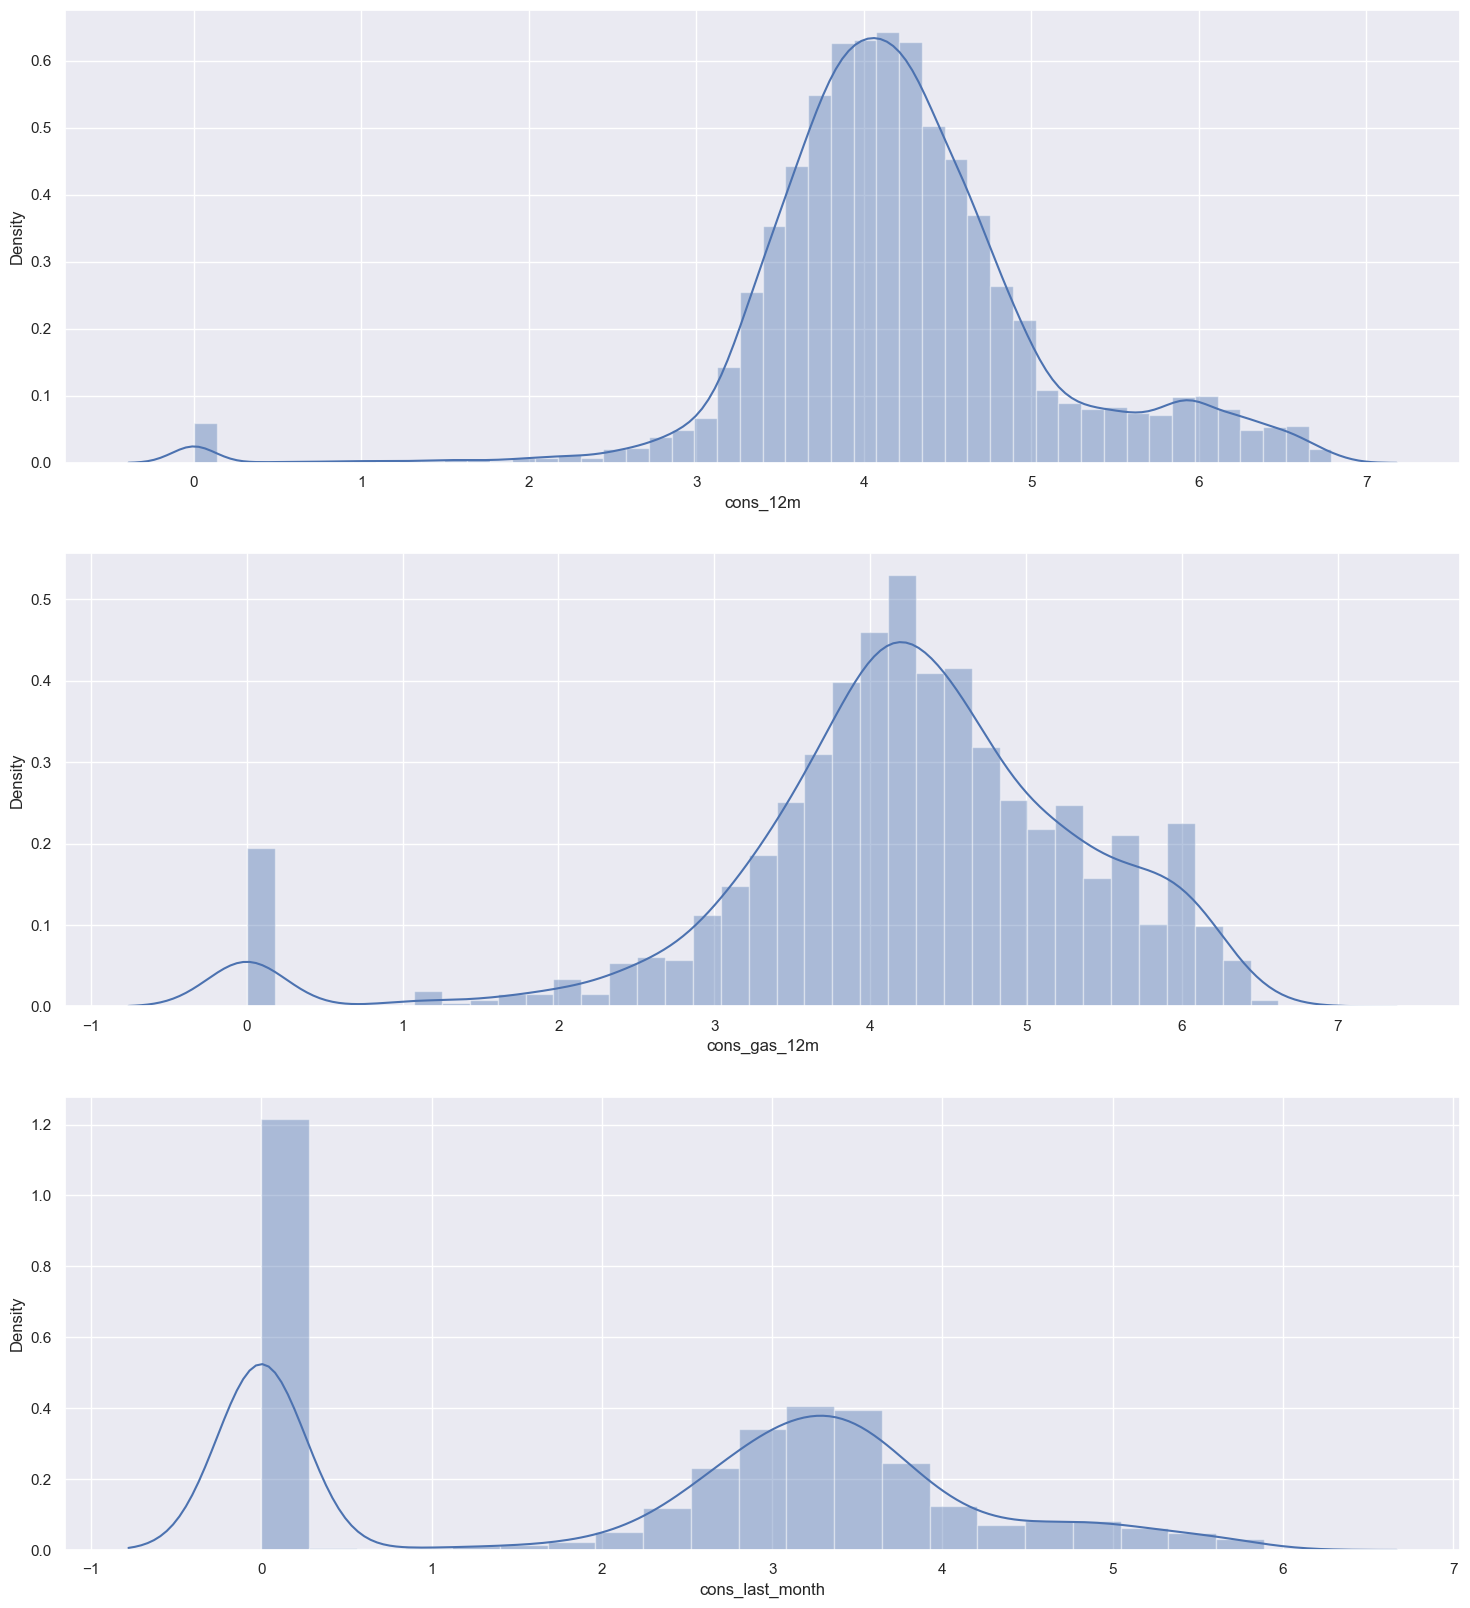

In [32]:
fig, axs = plt.subplots(nrows=3, figsize=(18, 20))
# Plot histograms
sns.distplot((df["cons_12m"].dropna()), ax=axs[0])
sns.distplot((df[df["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1])
sns.distplot((df["cons_last_month"].dropna()), ax=axs[2])
plt.show()

Correlations
In terms of creating new features and transforming existing ones, it is very much a trial and error
situation that requires iteration. Once we train a predictive model we can see which features work
and don’t work, we will also know how predictive this set of features is. Based on this, we can come
back to feature engineering to enhance our model.
For now, we will leave feature engineering at this point. Another thing that is always useful to look
at is how correlated all of the features are within your dataset.
This is important because it reveals the linear relationships between features. We want features to
correlate with churn, as this will indicate that they are good predictors of it. However features that
22
have a very high correlation can sometimes be suspicious. This is because 2 columns that have high
correlation indicates that they may share a lot of the same information. One of the assumptions
of any parametric predictive model (as stated earlier) is that all features must be independent.
For features to be independent, this means that each feature must have absolutely no dependence
on any other feature. If two features are highly correlated and share similar information, this breaks
this assumption.
Ideally, you want a set of features that have 0 correlation with all of the independent variables
(all features except our target variable) and a high correlation with the target variable (churn).
However, this is very rarely the case and it is common to have a small degree of correlation between
independent features.
So now let’s look at how all the features within the model are correlated.

In [33]:
correlation = df.corr()

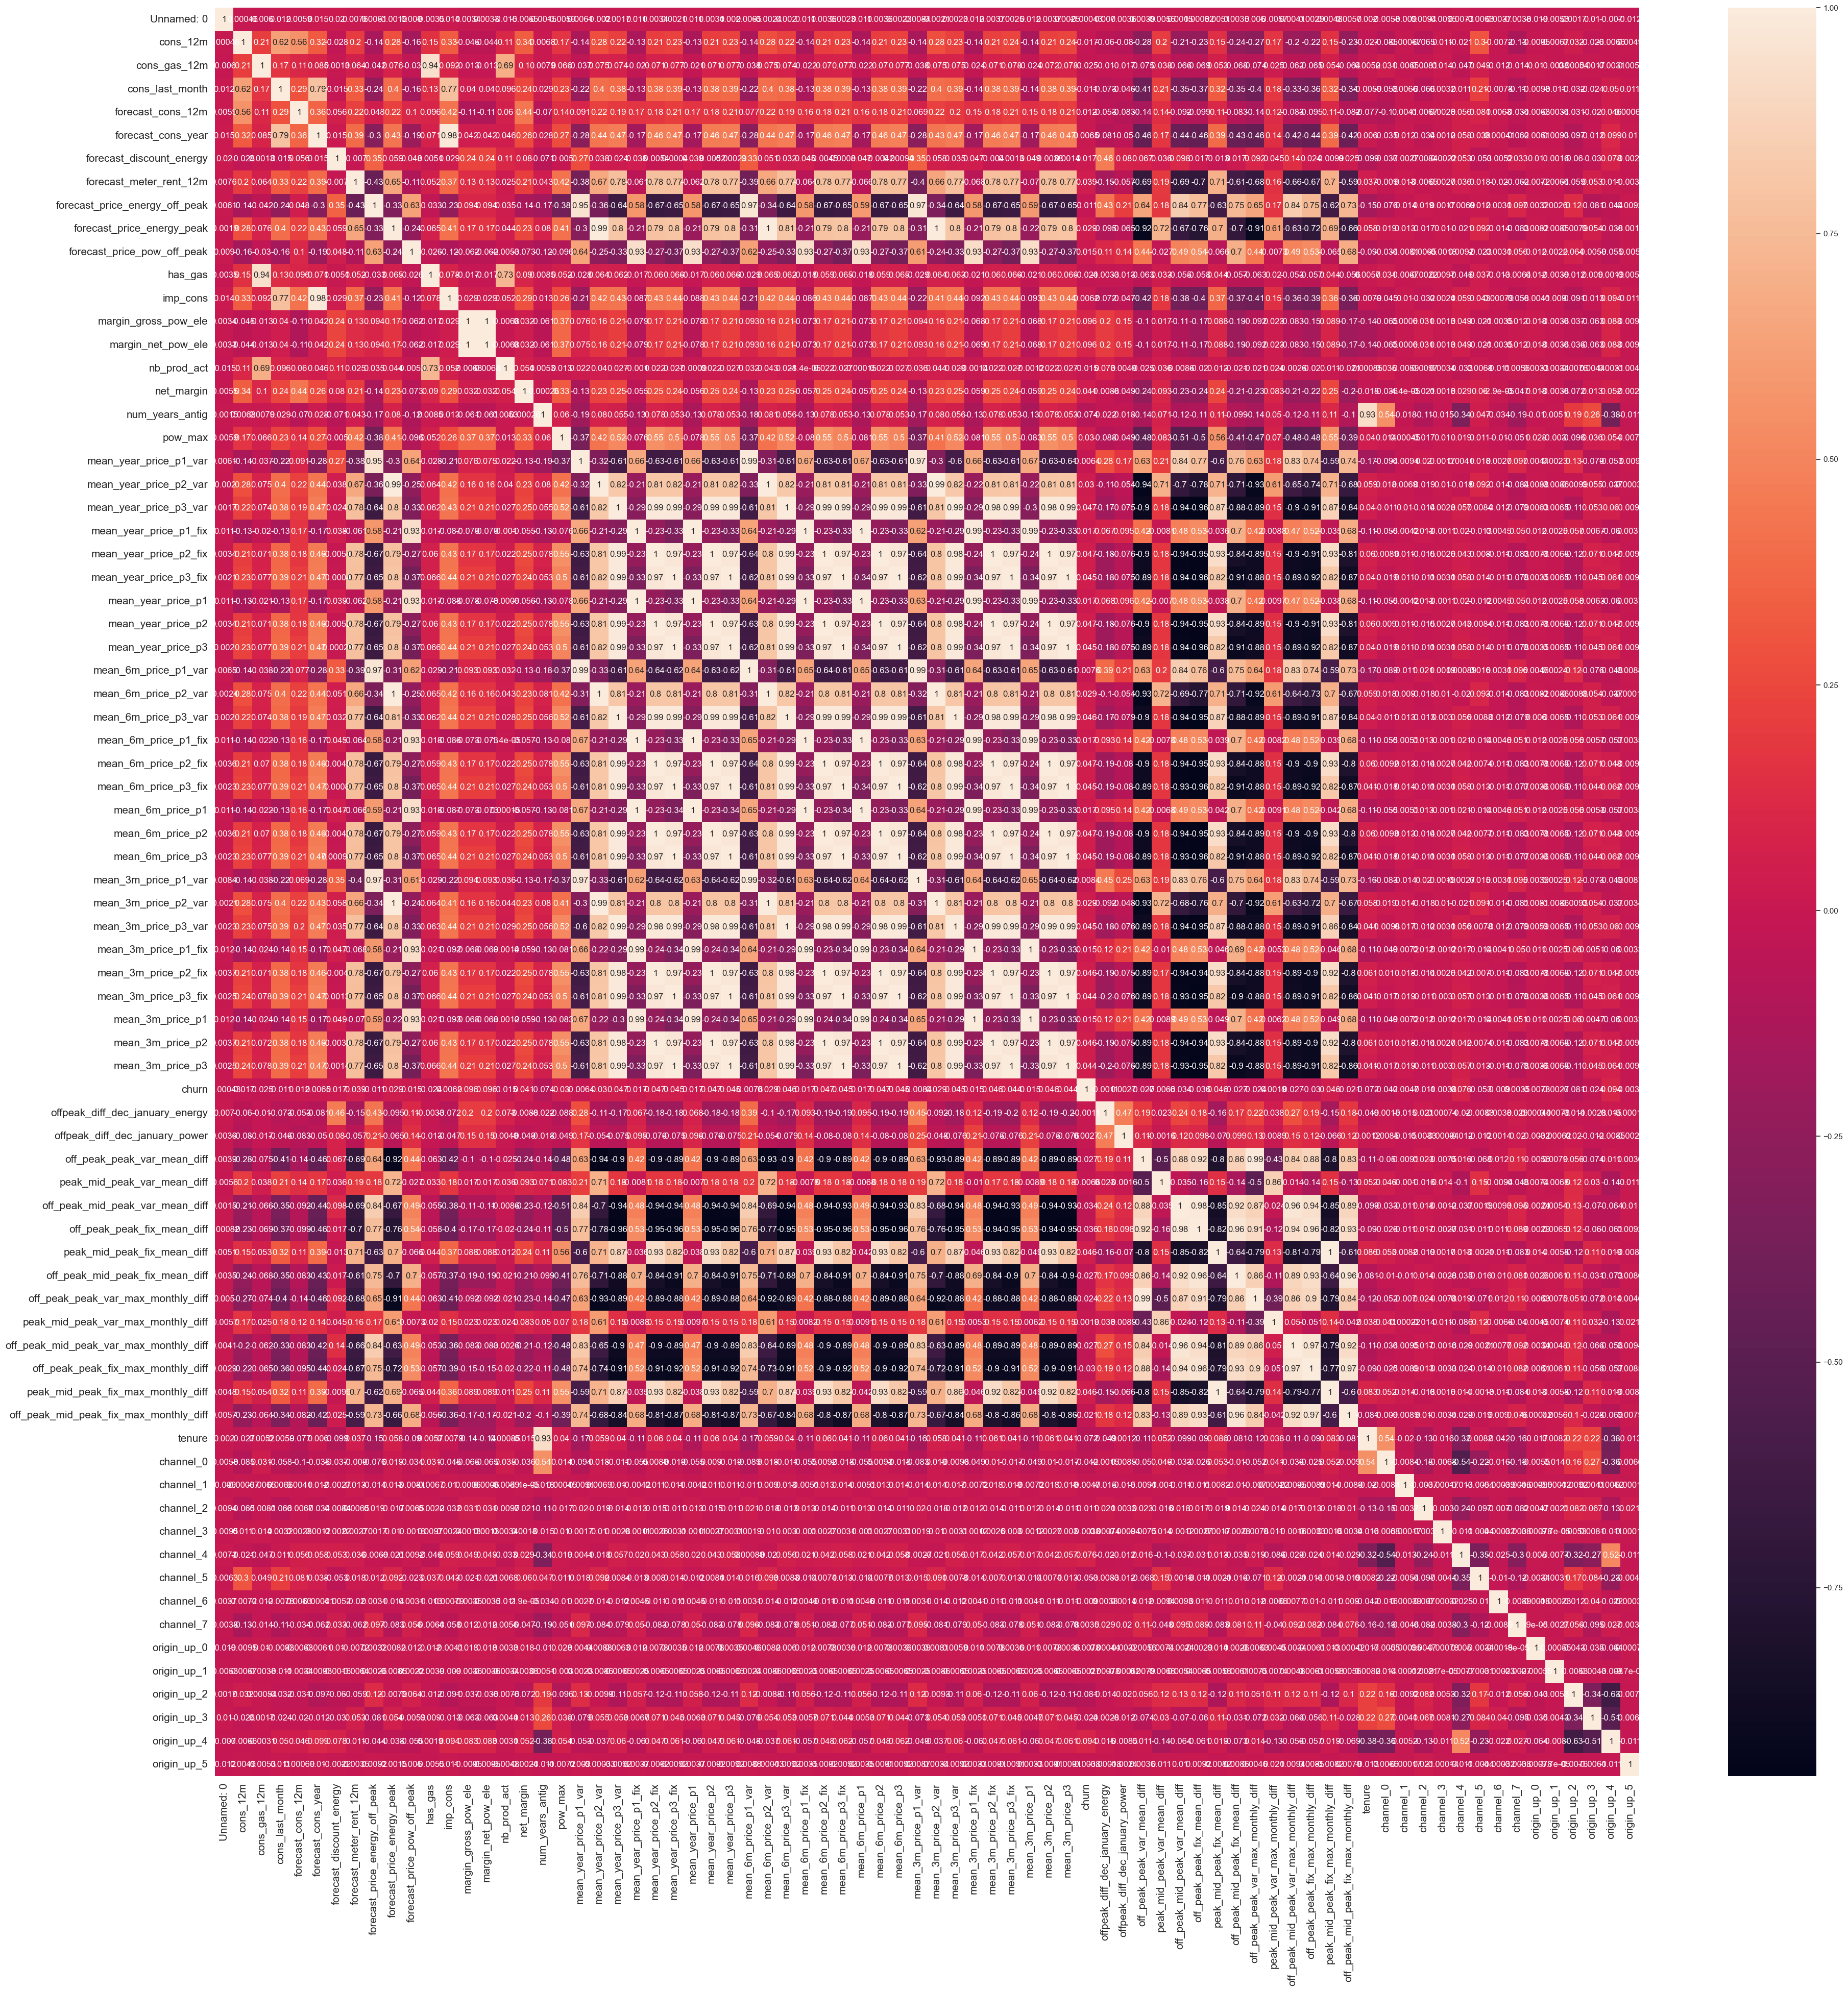

In [35]:
# Plot correlation
plt.figure(figsize=(45, 45))
sns.heatmap(
correlation,
xticklabels=correlation.columns.values,
yticklabels=correlation.columns.values,
annot=True,
annot_kws={'size': 12}
)
#Axis ticks size
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

For now, I will remove two variables which exhibit a high correlation with other independent
features.

In [36]:
df = df.drop(columns=['num_years_antig', 'forecast_cons_year'])
df.head()

Unnamed: 0                                id  cons_12m  cons_gas_12m  \
0           0  24011ae4ebbe3035111d65fa7c15bc57  0.000000      4.739944   
1           1  d29c2c54acc38ff3c0614d0a653813dd  3.668479      0.000000   
2           2  764c75f661154dac3a6c254cd082ea7d  2.736397      0.000000   
3           3  bba03439a292a1e166f80264c16191cb  3.200029      0.000000   
4           4  149d57cf92fc41cf94415803a877cb4b  3.646011      0.000000   

   cons_last_month  forecast_cons_12m  forecast_discount_energy  \
0         0.000000           0.000000                       0.0   
1         0.000000           2.280920                       0.0   
2         0.000000           1.689841                       0.0   
3         0.000000           2.382089                       0.0   
4         2.721811           2.650065                       0.0   

   forecast_meter_rent_12m  forecast_price_energy_off_peak  \
0                 0.444045                        0.114481   
1                 1.237292                        0.145711   
2                 1.599009                        0.165794   
3                 1.318689                        0.146694   
4                 2.122969                        0.116900   

   forecast_price_energy_peak  ...  channel_4  channel_5  channel_6  \
0                    0.098142  ...          1          0          0   
1                    0.000000  ...          0          0          0   
2                    0.087899  ...          1          0          0   
3                    0.000000  ...          0          1          0   
4                    0.100015  ...          0          0          0   

   channel_7  origin_up_0  origin_up_1  origin_up_2  origin_up_3  origin_up_4  \
0          0            0            0            0            0            1   
1          0            0            0            1            0            0   
2          0            0            0            1            0            0   
3          0            0            0            1            0            0   
4          0            0            0            1            0            0   

   origin_up_5  
0            0  
1            0  
2            0  
3            0  
4            0  

[5 rows x 75 columns]

In [37]:
df = df.drop(columns=['channel_6', 'channel_1', 'channel_3'])
df.head()

Unnamed: 0                                id  cons_12m  cons_gas_12m  \
0           0  24011ae4ebbe3035111d65fa7c15bc57  0.000000      4.739944   
1           1  d29c2c54acc38ff3c0614d0a653813dd  3.668479      0.000000   
2           2  764c75f661154dac3a6c254cd082ea7d  2.736397      0.000000   
3           3  bba03439a292a1e166f80264c16191cb  3.200029      0.000000   
4           4  149d57cf92fc41cf94415803a877cb4b  3.646011      0.000000   

   cons_last_month  forecast_cons_12m  forecast_discount_energy  \
0         0.000000           0.000000                       0.0   
1         0.000000           2.280920                       0.0   
2         0.000000           1.689841                       0.0   
3         0.000000           2.382089                       0.0   
4         2.721811           2.650065                       0.0   

   forecast_meter_rent_12m  forecast_price_energy_off_peak  \
0                 0.444045                        0.114481   
1                 1.237292                        0.145711   
2                 1.599009                        0.165794   
3                 1.318689                        0.146694   
4                 2.122969                        0.116900   

   forecast_price_energy_peak  ...  channel_2  channel_4  channel_5  \
0                    0.098142  ...          0          1          0   
1                    0.000000  ...          0          0          0   
2                    0.087899  ...          0          1          0   
3                    0.000000  ...          0          0          1   
4                    0.100015  ...          0          0          0   

   channel_7  origin_up_0  origin_up_1  origin_up_2  origin_up_3  origin_up_4  \
0          0            0            0            0            0            1   
1          0            0            0            1            0            0   
2          0            0            0            1            0            0   
3          0            0            0            1            0            0   
4          0            0            0            1            0            0   

   origin_up_5  
0            0  
1            0  
2            0  
3            0  
4            0  

[5 rows x 72 columns]

In [38]:
df = df.drop(columns=['origin_up_0', 'origin_up_5', 'origin_up_1'])
df.head()

Unnamed: 0                                id  cons_12m  cons_gas_12m  \
0           0  24011ae4ebbe3035111d65fa7c15bc57  0.000000      4.739944   
1           1  d29c2c54acc38ff3c0614d0a653813dd  3.668479      0.000000   
2           2  764c75f661154dac3a6c254cd082ea7d  2.736397      0.000000   
3           3  bba03439a292a1e166f80264c16191cb  3.200029      0.000000   
4           4  149d57cf92fc41cf94415803a877cb4b  3.646011      0.000000   

   cons_last_month  forecast_cons_12m  forecast_discount_energy  \
0         0.000000           0.000000                       0.0   
1         0.000000           2.280920                       0.0   
2         0.000000           1.689841                       0.0   
3         0.000000           2.382089                       0.0   
4         2.721811           2.650065                       0.0   

   forecast_meter_rent_12m  forecast_price_energy_off_peak  \
0                 0.444045                        0.114481   
1                 1.237292                        0.145711   
2                 1.599009                        0.165794   
3                 1.318689                        0.146694   
4                 2.122969                        0.116900   

   forecast_price_energy_peak  ...  off_peak_mid_peak_fix_max_monthly_diff  \
0                    0.098142  ...                                44.26693   
1                    0.000000  ...                                44.44471   
2                    0.087899  ...                                44.44471   
3                    0.000000  ...                                44.44471   
4                    0.100015  ...                                24.43733   

   tenure  channel_0  channel_2  channel_4  channel_5  channel_7  origin_up_2  \
0       3          0          0          1          0          0            0   
1       7          1          0          0          0          0            1   
2       6          0          0          1          0          0            1   
3       6          0          0          0          1          0            1   
4       6          1          0          0          0          0            1   

   origin_up_3  origin_up_4  
0            0            1  
1            0            0  
2            0            0  
3            0            0  
4            0            0  

[5 rows x 69 columns]

In [39]:
#We now have a dataset containing features that we have engineered and we are ready to start
#training a predictive model. Remember, we only need to focus on training a Random Forest
#classifier.
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

Data sampling
The first thing we want to do is split our dataset into training and test samples. The reason why
we do this, is so that we can simulate a real life situation by generating predictions for our test
sample, without showing the predictive model these data points. This gives us the ability to see
how well our model is able to generalise to new data, which is critical.
A typical % to dedicate to testing is between 20-30, for this example we will use a 75-25% split
26
between train and test respectively.

In [40]:
train_df = df.copy()
# Separate target variable from independent variables
y = df['churn']
X = df.drop(columns=['id', 'churn'])
print(X.shape)
print(y.shape)

(14605, 67)
(14605,)


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10953, 67)
(10953,)
(3652, 67)
(3652,)


Model training
Once again, we are using a Random Forest classifier in this example. A Random Forest sits
within the category of ensemble algorithms because internally the Forest refers to a collection of
Decision Trees which are tree-based learning algorithms. As the data scientist, you can control
how large the forest is (that is, how many decision trees you want to include).
The reason why an ensemble algorithm is powerful is because of the laws of averaging, weak learners
and the central limit theorem. If we take a single decision tree and give it a sample of data and
some parameters, it will learn patterns from the data. It may be overfit or it may be underfit, but
that is now our only hope, that single algorithm.
With ensemble methods, instead of banking on 1 single trained model, we can train 1000’s of
decision trees, all using different splits of the data and learning different patterns. It would be like
asking 1000 people to all learn how to code. You would end up with 1000 people with different
answers, methods and styles! The weak learner notion applies here too, it has been found that if
you train your learners not to overfit, but to learn weak patterns within the data and you have a lot
of these weak learners, together they come together to form a highly predictive pool of knowledge!
This is a real life application of many brains are better than 1.
Now instead of relying on 1 single decision tree for prediction, the random forest puts it to the
overall views of the entire collection of decision trees. Some ensemble algorithms using a voting
approach to decide which prediction is best, others using averaging.
As we increase the number of learners, the idea is that the random forest’s performance should
converge to its best possible solution.
Some additional advantages of the random forest classifier include:
• The random forest uses a rule-based approach instead of a distance calculation and so features
do not need to be scaled
• It is able to handle non-linear parameters better than linear based models
On the flip side, some disadvantages of the random forest classifier include:
• The computational power needed to train a random forest on a large dataset is high, since
we need to build a whole ensemble of estimators.
• Training time can be longer due to the increased complexity and size of the ensemble

In [42]:
model = RandomForestClassifier(n_estimators=1000)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [43]:
RandomForestClassifier(n_estimators=1000)

RandomForestClassifier(n_estimators=1000)

For this example, I am using n_estimators = 1000. This means that my random forest will consist
of 1000 decision trees. There are many more parameters that you can fine-tune within the random
forest and finding the optimal combinations of parameters can be a manual task of exploration,
trial and error, which will not be covered during this notebook.
1.7.3 Evaluation
Now let’s evaluate how well this trained model is able to predict the values of the test dataset.
We are going to use 3 metrics to evaluate performance:
• Accuracy = the ratio of correctly predicted observations to the total observations
• Precision = the ability of the classifier to not label a negative sample as positive
• Recall = the ability of the classifier to find all the positive samples
The reason why we are using these three metrics is because a simple accuracy is not always a good
measure to use. To give an example, let’s say you’re predicting heart failures with patients in a
hospital and there were 100 patients out of 1000 that did have a heart failure.
If you predicted 80 out of 100 (80%) of the patients that did have a heart failure correctly, you
might think that you’ve done well! However, this also means that you predicted 20 wrong and
what may the implications of predicting these remaining 20 patients wrong? Maybe they miss out
on getting vital treatment to save their lives.
As well as this, what about the impact of predicting negative cases as positive (people not having
heart failure being predicted that they did), maybe a high number of false positives means that
resources get used up on thee wrong people and a lot of time is wasted when they could have been
helping the real heart failure sufferers.


In [44]:
predictions = model.predict(X_test)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()

In [45]:
y_test.value_counts()

0    3279
1     373
Name: churn, dtype: int64

In [46]:
print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")
print(f"Accuracy: {metrics.accuracy_score(y_test, predictions)}")
print(f"Precision: {metrics.precision_score(y_test, predictions)}")
print(f"Recall: {metrics.recall_score(y_test, predictions)}")

True positives: 17
False positives: 1
True negatives: 3278
False negatives: 356

Accuracy: 0.9022453450164294
Precision: 0.9444444444444444
Recall: 0.045576407506702415


Model understanding
A simple way of understanding the results of a model is to look at feature importances. Feature
importances indicate the importance of a feature within the predictive model, there are several
ways to calculate feature importance, but with the Random Forest classifier, we’re able to extract
feature importances using the built-in method on the trained model. In the Random Forest case,
the feature importance represents the number of times each feature is used for splitting across all
trees.

In [47]:
feature_importances = pd.DataFrame({
'features': X_train.columns,
'importance': model.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()

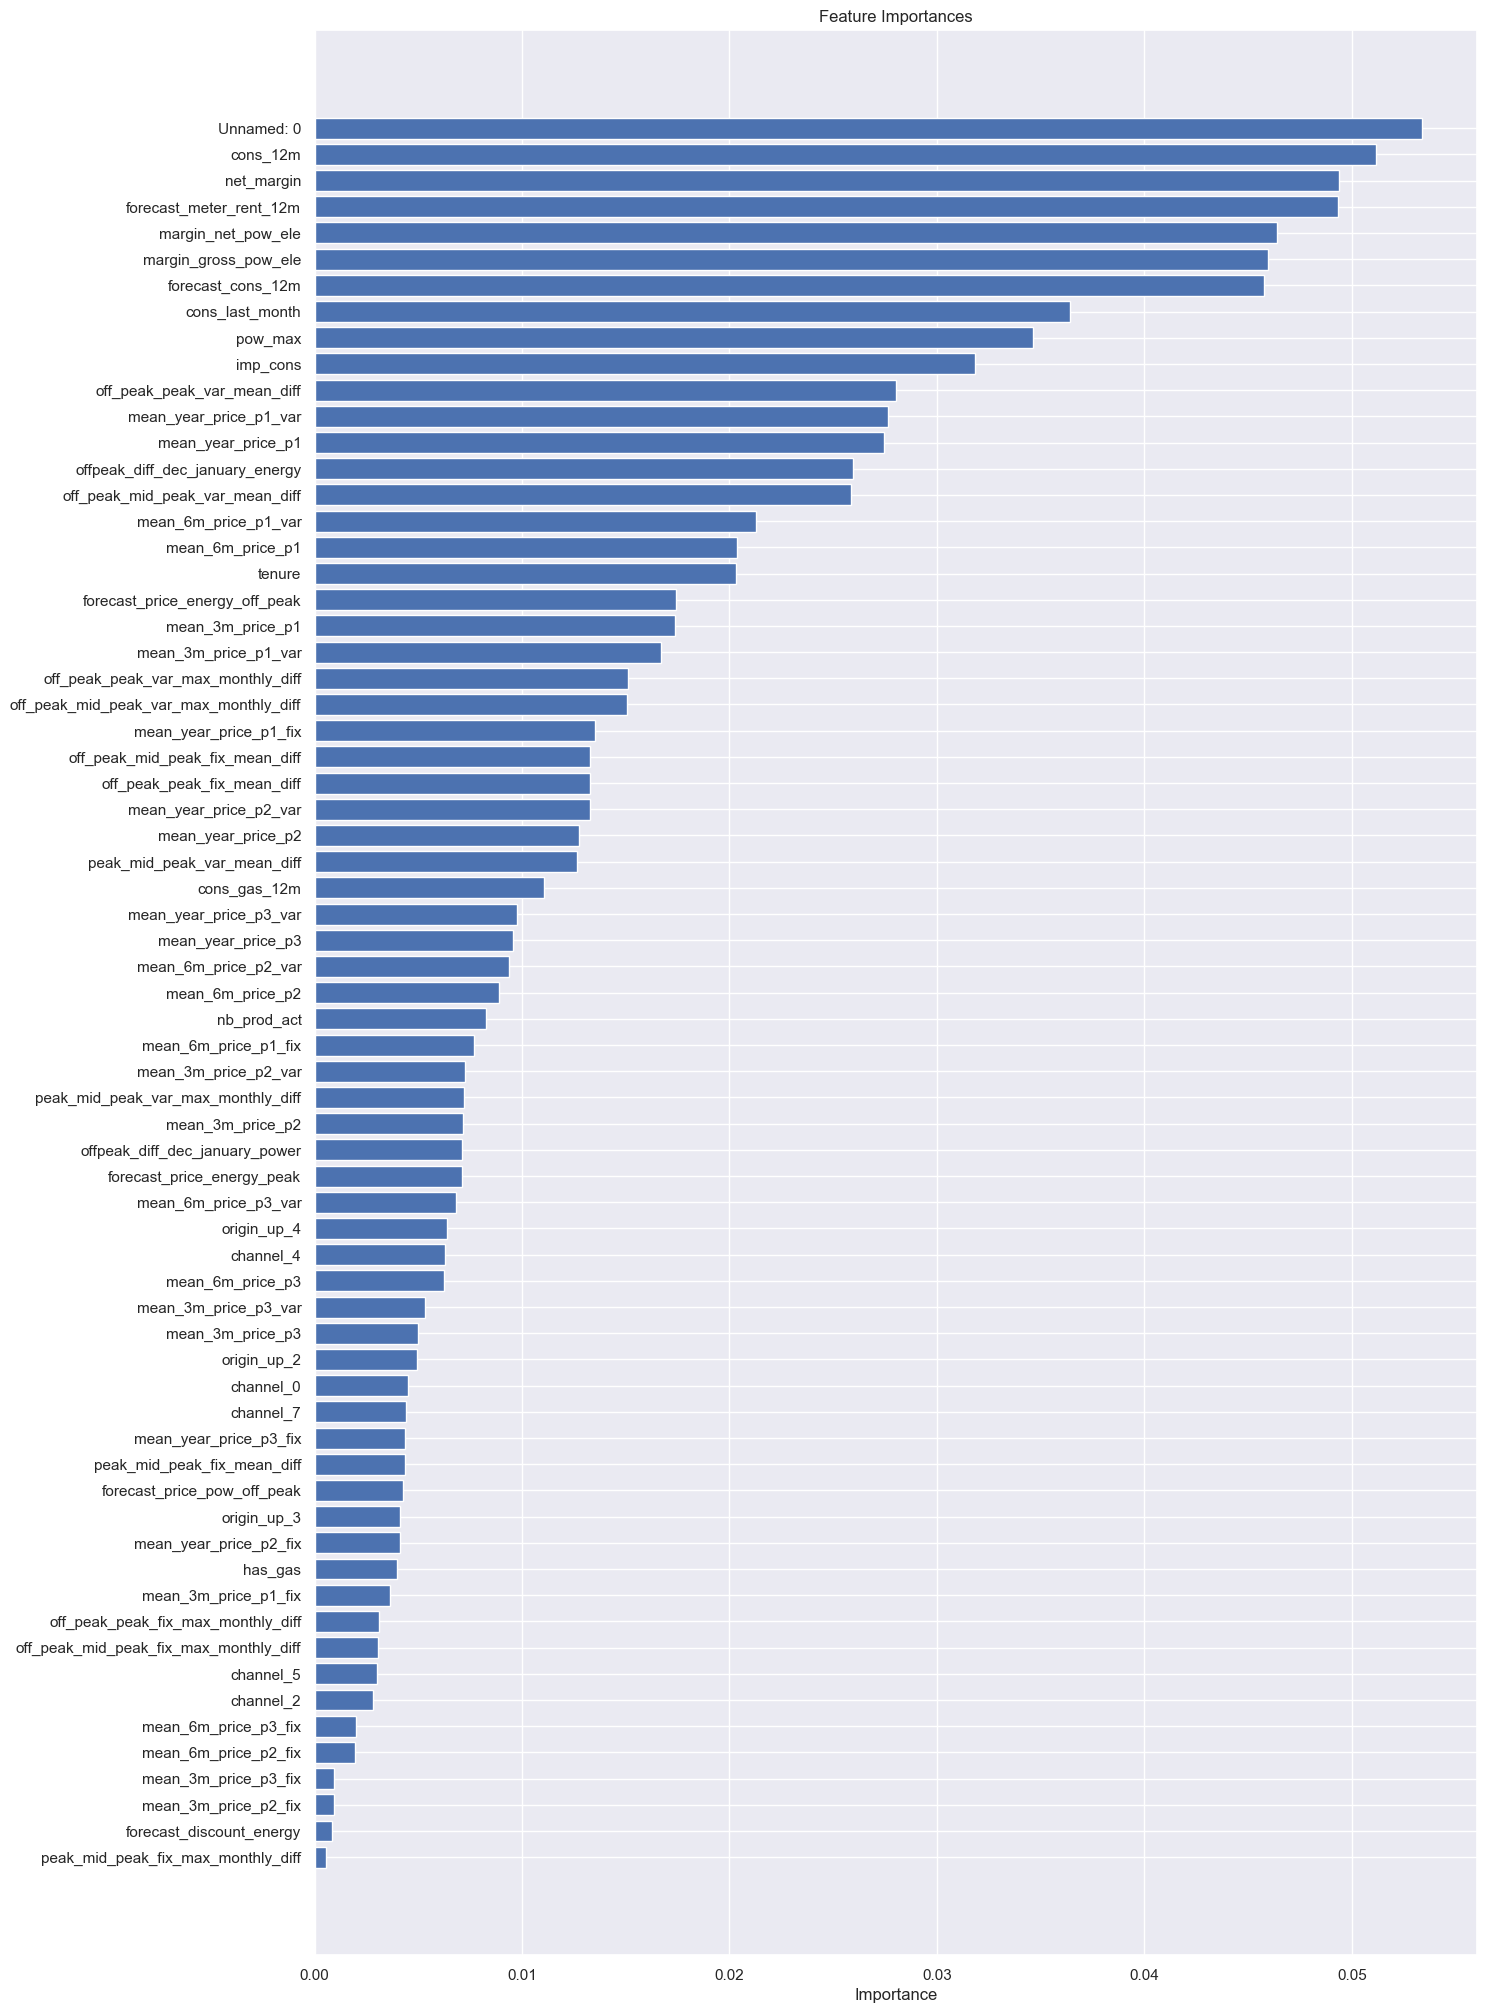

In [48]:
plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'],color='b', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()

From this chart, we can observe the following points:
• Net margin and consumption over 12 months is a top driver for churn in this model
• Margin on power subscription also is an influential driver
• Time seems to be an influential factor, especially the number of months they have been active,

their tenure and the number of months since they updated their contract
• The feature that our colleague recommended is in the top half in terms of how influential it
is and some of the features built off the back of this actually outperform it
• Our price sensitivity features are scattered around but are not the main driver for a customer
churning
The last observation is important because this relates back to our original hypothesis:

> Is churn driven by the customers' price sensitivity?
Based on the output of the feature importances, it is not a main driver but it is a weak contributor.
However, to arrive at a conclusive result, more experimentation is needed.

In [50]:
proba_predictions = model.predict_proba(X_test)
probabilities = proba_predictions[:, 1]

In [51]:
X_test = X_test.reset_index()
X_test.drop(columns='index', inplace=True)

In [52]:
X_test['churn'] = predictions.tolist()
X_test['churn_probability'] = probabilities.tolist()
X_test.to_csv('out_of_sample_data_with_predictions.csv')